<a href="https://colab.research.google.com/github/SayanBapariAI/Pytorch-Tutorial/blob/main/torch_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model from scratch

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
w = 0.7
b = 0.3

X = torch.arange(0,1,0.02).unsqueeze(1)

In [ ]:
y = (w * X + b)
y


tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260],
        [0.4400],
        [0.4540],
        [0.4680],
        [0.4820],
        [0.4960],
        [0.5100],
        [0.5240],
        [0.5380],
        [0.5520],
        [0.5660],
        [0.5800],
        [0.5940],
        [0.6080],
        [0.6220],
        [0.6360],
        [0.6500],
        [0.6640],
        [0.6780],
        [0.6920],
        [0.7060],
        [0.7200],
        [0.7340],
        [0.7480],
        [0.7620],
        [0.7760],
        [0.7900],
        [0.8040],
        [0.8180],
        [0.8320],
        [0.8460],
        [0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

In [ ]:
split = int(0.8*len(X))
X_train, y_train = torch.tensor(X[:split]), torch.tensor(y[:split])
X_test, y_test = torch.tensor(X[split:]), torch.tensor(y[split:])

<ipython-input-9-9b451049466a>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train, y_train = torch.tensor(X[:split]), torch.tensor(y[:split])
<ipython-input-9-9b451049466a>:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test, y_test = torch.tensor(X[split:]), torch.tensor(y[split:])


In [ ]:
X_train.shape

torch.Size([40, 1])

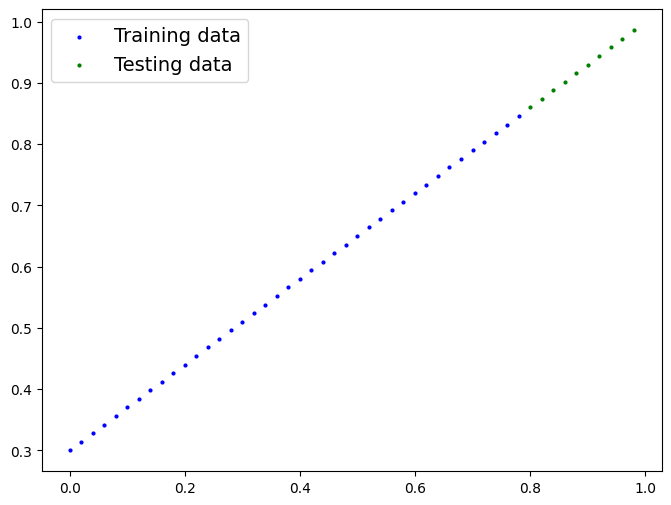

In [ ]:
plt.figure(figsize=(8, 6))

  # Plot training data in blue
plt.scatter(X_train, y_train, c="b", s=4, label="Training data")

  # Plot test data in green
plt.scatter(X_test, y_test, c="g", s=4, label="Testing data")

plt.legend(prop={"size": 14});

In [ ]:
class model(nn.Module):
  def __init__(self):
    super().__init__()
    self.weight = nn.Parameter(torch.randn(1, dtype =torch.float, requires_grad=True))
    self.bias = nn.Parameter(torch.randn(1, dtype =torch.float, requires_grad=True))

  def forward(self, X:torch.Tensor) -> torch.Tensor:
    return self.weight*X+self.bias

In [ ]:
torch.manual_seed(42)

model_1 = model()

list(model_1.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
model_1.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
with torch.inference_mode():
  pre = model_1(X_test)

In [ ]:
pre[0]

tensor([0.3982])

In [ ]:
y_test[0]

tensor([0.8600])

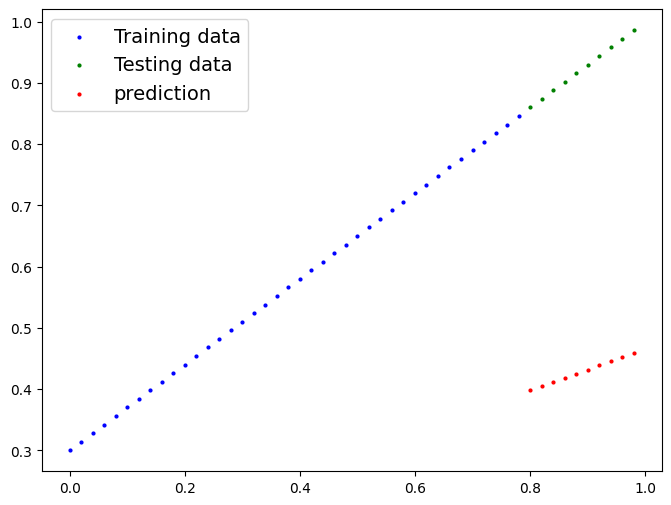

In [ ]:
plt.figure(figsize=(8, 6))

  # Plot training data in blue
plt.scatter(X_train, y_train, c="b", s=4, label="Training data")

  # Plot test data in green
plt.scatter(X_test, y_test, c="g", s=4, label="Testing data")

plt.scatter(X_test, pre, c= 'r', s = 4, label = "prediction")

plt.legend(prop={"size": 14});

In [ ]:
y_test - pre

tensor([[0.4618],
        [0.4691],
        [0.4764],
        [0.4836],
        [0.4909],
        [0.4982],
        [0.5054],
        [0.5127],
        [0.5200],
        [0.5272]])

In [ ]:
loss_fn = nn.L1Loss() # MAE is written as L1Loss in pytorch

optimizer = torch.optim.SGD(params = model_1.parameters(), lr = 0.001)

In [ ]:
torch.manual_seed(42)

epochs  = 100

train_loss = []
test_loss1 = []
no_epochs = []

for epoch in range(epochs):

  model_1.train()

  pred = model_1(X_train)

  loss = loss_fn(pred, y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_1.eval()

  with torch.inference_mode():
    test_pred = model_1(X_test)

    test_loss = loss_fn(test_pred, y_test.type(torch.float))

    if epochs % 10 == 0:
      no_epochs.append(epoch)
      train_loss.append(loss.detach().numpy())
      test_loss1.append(test_loss.detach().numpy())
      print(f"Epoch: {epoch} \t| MAE Train Loss: {loss} \t| MAE Test Loss: {test_loss} ")


Epoch: 0 | MAE Train Loss: 0.15998168289661407 | MAE Test Loss: 0.2852901220321655 
Epoch: 1 | MAE Train Loss: 0.15882958471775055 | MAE Test Loss: 0.2839429974555969 
Epoch: 2 | MAE Train Loss: 0.15767748653888702 | MAE Test Loss: 0.2825959324836731 
Epoch: 3 | MAE Train Loss: 0.1565253883600235 | MAE Test Loss: 0.2812488377094269 
Epoch: 4 | MAE Train Loss: 0.15537329018115997 | MAE Test Loss: 0.2799017131328583 
Epoch: 5 | MAE Train Loss: 0.15422119200229645 | MAE Test Loss: 0.27855461835861206 
Epoch: 6 | MAE Train Loss: 0.15306907892227173 | MAE Test Loss: 0.27720752358436584 
Epoch: 7 | MAE Train Loss: 0.1519169807434082 | MAE Test Loss: 0.275860458612442 
Epoch: 8 | MAE Train Loss: 0.15076488256454468 | MAE Test Loss: 0.2745133340358734 
Epoch: 9 | MAE Train Loss: 0.14961278438568115 | MAE Test Loss: 0.2731662392616272 
Epoch: 10 | MAE Train Loss: 0.14846070110797882 | MAE Test Loss: 0.27181917428970337 
Epoch: 11 | MAE Train Loss: 0.1473085880279541 | MAE Test Loss: 0.270472079

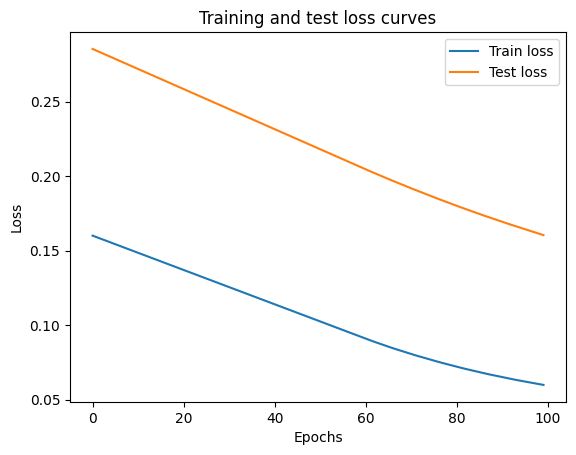

In [ ]:
plt.plot(no_epochs, train_loss, label="Train loss")
plt.plot(no_epochs, test_loss1, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [ ]:
# 1. Set the model in evaluation mode
model_1.eval()

# 2. Setup the inference mode context manager
with torch.inference_mode():
  # 3. Make sure the calculations are done with the model and data on the same device
  # in our case, we haven't setup device-agnostic code yet so our data and model are
  # on the CPU by default.
  # model_0.to(device)
  # X_test = X_test.to(device)
  predict = model_1(X_test)
predict

tensor([[0.7190],
        [0.7287],
        [0.7384],
        [0.7481],
        [0.7578],
        [0.7675],
        [0.7772],
        [0.7869],
        [0.7966],
        [0.8064]])

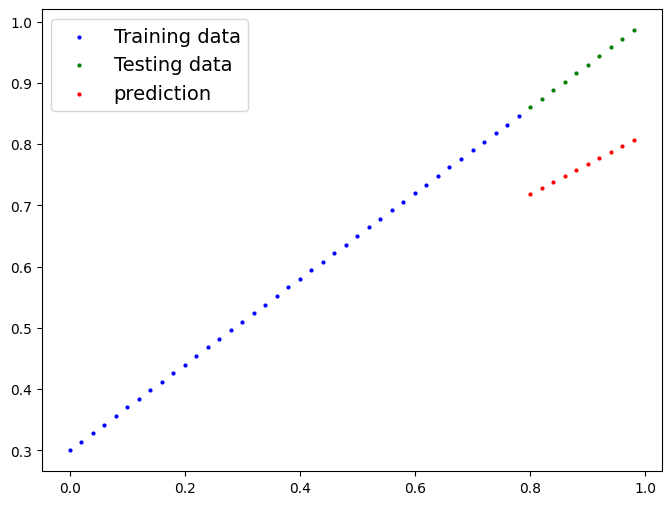

In [ ]:
plt.figure(figsize=(8, 6))

  # Plot training data in blue
plt.scatter(X_train, y_train, c="b", s=4, label="Training data")

  # Plot test data in green
plt.scatter(X_test, y_test, c="g", s=4, label="Testing data")

plt.scatter(X_test, predict, c= 'r', s = 4, label = "prediction")

plt.legend(prop={"size": 14});

# Pratice

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [ ]:
weight = 0.7
bias = 0.5

X = torch.arange(0,1,0.02)
y = torch.tensor(X * weight + bias)

<ipython-input-26-4f36a270ba35>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(X * weight + bias)


In [ ]:
X.shape, y.shape

(torch.Size([50]), torch.Size([50]))

In [ ]:
length = int(0.8*len(X))

X_train, y_train = torch.tensor(X[:length]), torch.tensor(y[:length] )
X_test, y_test = torch.tensor(X[length:]), torch.tensor(y[length:])

X_train.shape, y_train.shape, X_test.shape, y_test.shape

<ipython-input-28-c202d7d07c6c>:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train, y_train = torch.tensor(X[:length]), torch.tensor(y[:length] )
<ipython-input-28-c202d7d07c6c>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test, y_test = torch.tensor(X[length:]), torch.tensor(y[length:])


(torch.Size([40]), torch.Size([40]), torch.Size([10]), torch.Size([10]))

In [ ]:
class modelclass(nn.Module):
  def __init__(self):
    super().__init__()
    self.weight = nn.Parameter(torch.randn(1, dtype = torch.float, requires_grad=True))

    self.bias = nn.Parameter(torch.randn(1, dtype = torch.float, requires_grad=True))

  def forward(self, X: torch.Tensor):
    return self.weight * X + self.bias


In [ ]:
trial_model = modelclass()

In [ ]:
torch.manual_seed(42)
with torch.no_grad():
  pre = trial_model(X_test)

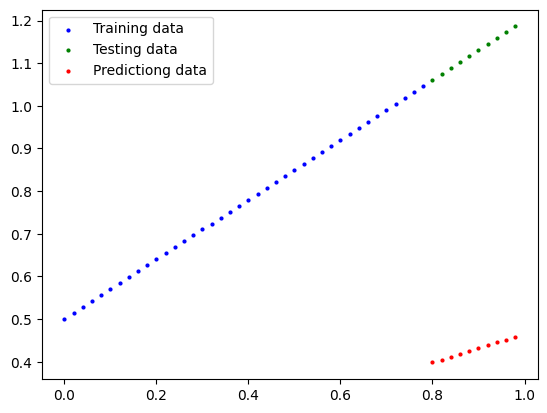

In [ ]:
plt.scatter(X_train, y_train, c = 'b', s = 4, label = "Training data")

plt.scatter(X_test, y_test, c = 'g', s = 4, label = "Testing data")

plt.scatter(X_test, pre, c= 'r', s=4, label = "Predictiong data")

plt.legend()

In [ ]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params = trial_model.parameters(), lr = 0.01)

In [ ]:
epochs = 101

for epoch in range(epochs):
  trial_model.train()

  pred = trial_model(X_train)
  loss = loss_fn(pred, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  trial_model.eval()
  print(f"epoch: {epoch} | loss: {float(loss)}")

epoch: 0 | loss: 0.017087901011109352
epoch: 1 | loss: 0.01674521528184414
epoch: 2 | loss: 0.01639888621866703
epoch: 3 | loss: 0.016060011461377144
epoch: 4 | loss: 0.01571100577712059
epoch: 5 | loss: 0.015373677015304565
epoch: 6 | loss: 0.015025804750621319
epoch: 7 | loss: 0.014684662222862244
epoch: 8 | loss: 0.014340599067509174
epoch: 9 | loss: 0.013995649293065071
epoch: 10 | loss: 0.013655396178364754
epoch: 11 | loss: 0.013306629844009876
epoch: 12 | loss: 0.012970191426575184
epoch: 13 | loss: 0.012621201574802399
epoch: 14 | loss: 0.012281415984034538
epoch: 15 | loss: 0.011935991235077381
epoch: 16 | loss: 0.011592407710850239
epoch: 17 | loss: 0.011250789277255535
epoch: 18 | loss: 0.010903393849730492
epoch: 19 | loss: 0.010565581731498241
epoch: 20 | loss: 0.010216591879725456
epoch: 21 | loss: 0.009878182783722878
epoch: 22 | loss: 0.009531376883387566
epoch: 23 | loss: 0.00918916892260313
epoch: 24 | loss: 0.008846180513501167
epoch: 25 | loss: 0.008500151336193085


In [ ]:
with torch.no_grad():
  y_pred = trial_model(X_test)
y_pred.unsqueeze(1)

tensor([[1.0650],
        [1.0789],
        [1.0928],
        [1.1067],
        [1.1206],
        [1.1345],
        [1.1484],
        [1.1623],
        [1.1762],
        [1.1901]])

In [ ]:
y_test.unsqueeze(1)

tensor([[1.0600],
        [1.0740],
        [1.0880],
        [1.1020],
        [1.1160],
        [1.1300],
        [1.1440],
        [1.1580],
        [1.1720],
        [1.1860]])

In [ ]:
torch.abs(y_pred - y_test).unsqueeze(1)

tensor([[0.0050],
        [0.0049],
        [0.0048],
        [0.0047],
        [0.0046],
        [0.0045],
        [0.0044],
        [0.0043],
        [0.0042],
        [0.0041]])

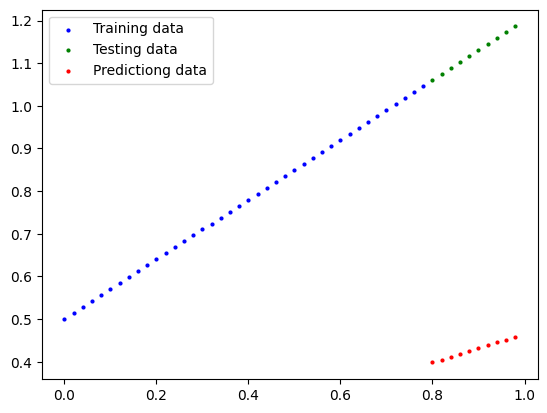

In [ ]:
plt.scatter(X_train, y_train, c = 'b', s = 4, label = "Training data")

plt.scatter(X_test, y_test, c = 'g', s = 4, label = "Testing data")

plt.scatter(X_test, pre, c= 'r', s=4, label = "Predictiong data")

plt.legend()

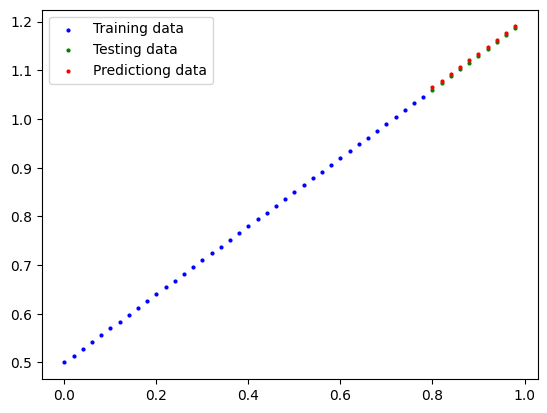

In [ ]:
plt.scatter(X_train, y_train, c = 'b', s = 4, label = "Training data")

plt.scatter(X_test, y_test, c = 'g', s = 4, label = "Testing data")

plt.scatter(X_test, y_pred, c= 'r', s=4, label = "Predictiong data")

plt.legend()

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [ ]:
weight , bias = 0.7,0.3
X = torch.arange(0,1,0.01)
y = weight * X +bias

In [ ]:
X.shape, y.shape

(torch.Size([100]), torch.Size([100]))

In [ ]:
length = int(0.8*len(X))
X_train, y_train = X[:length], y[:length]
X_test, y_test = X[length:], y[length:]
X_train.shape, y_train.shape, X_test.shape, y_test.shape

(torch.Size([80]), torch.Size([80]), torch.Size([20]), torch.Size([20]))

In [ ]:
class Model(nn.Module):
  def __init__(self):
    super().__init__()
    self.w = nn.Parameter(torch.randn(1,dtype=torch.float, requires_grad = True))
    self.b = nn.Parameter(torch.randn(1,dtype=torch.float, requires_grad = True))

  def forward(self, X:torch.Tensor):
    return self.w * X + self.b


In [ ]:
model = Model()

In [ ]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.Adam(params=model.parameters(), lr = 0.1 )

In [ ]:
epochs = 100

for _ in range(epochs+1):
  # Training
  model.train()
  pred = model(X_train)
  loss = loss_fn(pred, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # Testing
  model.eval()

  with torch.inference_mode():
    test_pred = model(X_test)
    test_loss = loss_fn(test_pred, y_test)
    print(f"Epoch: {_}\t |\t Test: {loss}\t |\t Test loss: {test_loss}")

  if _ % 10 == 0:
    wb = list(model.parameters())
    w, b = wb
    w, b = round(float(w),1), round(float(b),1)
    print("---------------------------------------------------------------------")
    print(f"weight:{w}\t |\t bias: {b}")
    print("---------------------------------------------------------------------")
print("Model training and testing completed")

Epoch: 0	 |	 Test: 0.6335176229476929	 |	 Test loss: 1.5992289781570435
---------------------------------------------------------------------
weight:-2.2	 |	 bias: 1.3
---------------------------------------------------------------------
Epoch: 1	 |	 Test: 0.5870890617370605	 |	 Test loss: 1.4144024848937988
Epoch: 2	 |	 Test: 0.5566071271896362	 |	 Test loss: 1.2473387718200684
Epoch: 3	 |	 Test: 0.540817141532898	 |	 Test loss: 1.1193678379058838
Epoch: 4	 |	 Test: 0.5323804616928101	 |	 Test loss: 1.0325844287872314
Epoch: 5	 |	 Test: 0.5224586129188538	 |	 Test loss: 0.9782503843307495
Epoch: 6	 |	 Test: 0.5079596638679504	 |	 Test loss: 0.944434642791748
Epoch: 7	 |	 Test: 0.4896215498447418	 |	 Test loss: 0.9247357249259949
Epoch: 8	 |	 Test: 0.468667209148407	 |	 Test loss: 0.9152761697769165
Epoch: 9	 |	 Test: 0.4463379383087158	 |	 Test loss: 0.9118953943252563
Epoch: 10	 |	 Test: 0.42399755120277405	 |	 Test loss: 0.909964919090271
--------------------------------------------

In [ ]:
with torch.no_grad():
  y_pred = model(X_test)
y_pred

tensor([0.8397, 0.8464, 0.8531, 0.8598, 0.8665, 0.8732, 0.8799, 0.8867, 0.8934,
        0.9001, 0.9068, 0.9135, 0.9202, 0.9269, 0.9336, 0.9403, 0.9470, 0.9537,
        0.9604, 0.9671])

In [ ]:
y_pred = torch.abs(y_pred)
y_pred

tensor([0.8397, 0.8464, 0.8531, 0.8598, 0.8665, 0.8732, 0.8799, 0.8867, 0.8934,
        0.9001, 0.9068, 0.9135, 0.9202, 0.9269, 0.9336, 0.9403, 0.9470, 0.9537,
        0.9604, 0.9671])

In [ ]:
y_test

tensor([0.8600, 0.8670, 0.8740, 0.8810, 0.8880, 0.8950, 0.9020, 0.9090, 0.9160,
        0.9230, 0.9300, 0.9370, 0.9440, 0.9510, 0.9580, 0.9650, 0.9720, 0.9790,
        0.9860, 0.9930])

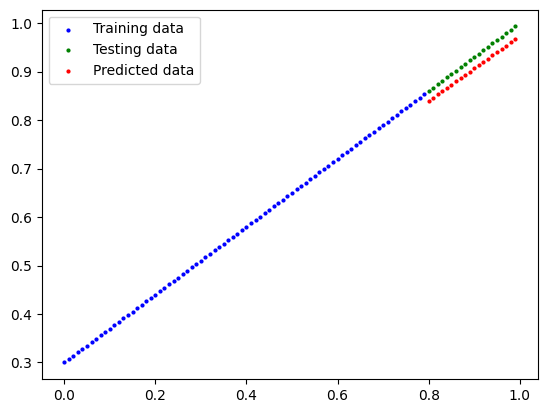

In [ ]:
plt.scatter(X_train, y_train, c = 'b', s = 4, label = "Training data")
plt.scatter(X_test, y_test, c = 'g', s = 4, label = "Testing data")
plt.scatter(X_test, y_pred, c = 'r', s = 4, label = 'Predicted data')
plt.legend();

In [ ]:
wb = list(model.parameters())
w, b = wb
w, b = round(float(w),1), round(float(b),1)
w, b

(0.7, 0.3)

In [ ]:
weight, bias

(0.7, 0.3)

In [ ]:
model.state_dict()

OrderedDict([('w', tensor([0.6704])), ('b', tensor([0.3034]))])

In [ ]:
torch.save(model.state_dict(),"/content/drive/MyDrive/Colab Notebooks/Model_0.pth")

In [ ]:
loaded_model_0 = Model()

# Load the state_dict of our saved model (this will update the new instance of our model with trained weights)
loaded_model_0.load_state_dict(torch.load(f="/content/drive/MyDrive/Colab Notebooks/Model_0.pth"))

<All keys matched successfully>

In [ ]:
loaded_model_0.eval()

with torch.no_grad():
  load_pred = loaded_model_0(X_test)

In [ ]:
torch.tensor(load_pred == y_pred).unsqueeze(1)

<ipython-input-23-b83a589bdae6>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(load_pred == y_pred).unsqueeze(1)


tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

# Linear Model with 1 Linear layer of torch

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [ ]:
weight = 0.7
bias = 0.3

X = torch.arange(0,1,0.02).unsqueeze(1)
y = X * weight + bias

In [ ]:
length = int(0.8*len(X))
X_train, y_train= X[:length], y [:length]
X_test, y_test = X[length:], y[length:]

In [ ]:
class LinearModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features=1, out_features=1)
  def forward(self, X:torch.Tensor):
    return self.linear_layer(X)


In [ ]:
torch.manual_seed(42)

linear_model = LinearModel()
linear_model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [ ]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.Adam(params = linear_model.parameters(), lr = 0.1)

In [ ]:
epochs = 100

for _ in range(epochs):
  linear_model.train()
  pred = linear_model(X_train)
  loss = loss_fn(pred, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  linear_model.eval()

In [ ]:
with torch.no_grad():
  y_pred = linear_model(X_test)


In [ ]:
y_pred

tensor([[0.8584],
        [0.8723],
        [0.8861],
        [0.9000],
        [0.9138],
        [0.9277],
        [0.9415],
        [0.9553],
        [0.9692],
        [0.9830]])

In [ ]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

In [ ]:
list(linear_model.parameters())

[Parameter containing:
 tensor([[0.6921]], requires_grad=True),
 Parameter containing:
 tensor([0.3048], requires_grad=True)]

# New Torch

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [ ]:
X = torch.arange(0,100,2, dtype = torch.float).unsqueeze(1)
y = 1.0 * X + 2.0

split = int(len(X)*0.8)
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]

In [ ]:
class Model(nn.Module):
  def __init__(self):
    super().__init__()
    self.weight = nn.Parameter(torch.randn(1,dtype = torch.float, requires_grad=True))
    self.bias = nn.Parameter(torch.randn(1,dtype = torch.float, requires_grad=True))
  def forward(self, X:torch.Tensor) -> torch.Tensor:
    return self.weight * X + self.bias

In [ ]:
model = Model()

In [ ]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.Adam(params = model.parameters(), lr = 0.1)

In [ ]:
epochs = 100

for _ in range(epochs):
  model.train()
  pred = model(X_train)
  loss = loss_fn(pred, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model.eval()

In [ ]:
with torch.no_grad():
  y_pred = model(X_test)

In [ ]:
y_pred

tensor([[ 82.5441],
        [ 84.5790],
        [ 86.6138],
        [ 88.6487],
        [ 90.6835],
        [ 92.7183],
        [ 94.7532],
        [ 96.7880],
        [ 98.8229],
        [100.8577]])

In [ ]:
y_test

tensor([[ 82.],
        [ 84.],
        [ 86.],
        [ 88.],
        [ 90.],
        [ 92.],
        [ 94.],
        [ 96.],
        [ 98.],
        [100.]])

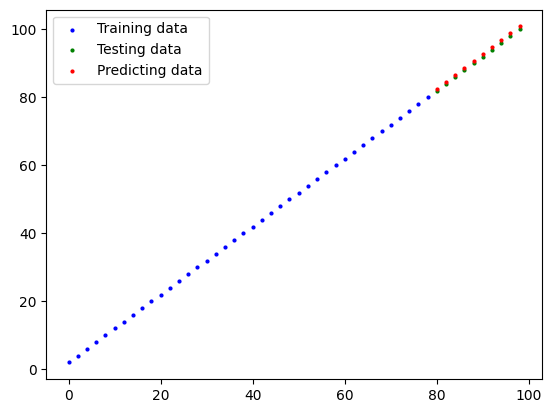

In [ ]:
plt.scatter(X_train, y_train, c = 'b', label = "Training data", s = 4)
plt.scatter(X_test, y_test , c = 'g', label = "Testing data", s = 4)
plt.scatter(X_test, y_pred, c = 'r', label = "Predicting data", s = 4)
plt.legend()
plt.show();

In [ ]:
class Model2(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(in_features=1,out_features=3)
    self.linear2 = nn.Linear(in_features=3,out_features=1)
  def forward(self, X:torch.Tensor)-> torch.Tensor:
    return self.linear2(self.linear(X))

In [ ]:
model2 = Model2()
loss_fn = nn.L1Loss()
optimizer = torch.optim.Adam(params = model2.parameters(), lr = 0.1)

In [ ]:
model3 = nn.Sequential(
  nn.Linear(1,10),
  nn.ReLU(),
  nn.Linear(10,5),
  nn.ReLU(),
  nn.Linear(5,1)
  )

In [ ]:
epochs = 200

for _ in range(epochs):
  model3.train()
  pred = model3(X_train)
  loss = loss_fn(pred, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model.eval()

In [ ]:
with torch.no_grad():
  y_pred = model(X_test)

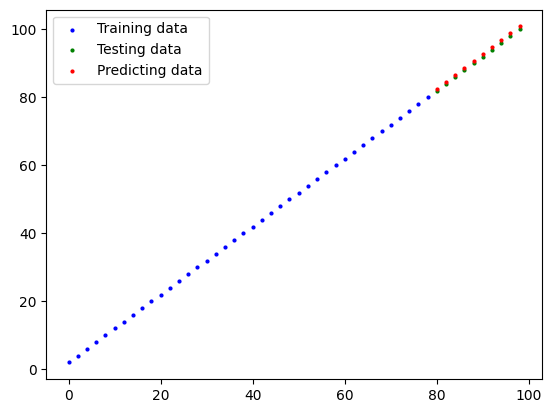

In [ ]:
plt.scatter(X_train, y_train, c = 'b', label = "Training data", s = 4)
plt.scatter(X_test, y_test , c = 'g', label = "Testing data", s = 4)
plt.scatter(X_test, y_pred, c = 'r', label = "Predicting data", s = 4)
plt.legend()
plt.show();

In [ ]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "model_3.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/model_3.pth


In [ ]:
model_4 = Model()

In [ ]:
model_4.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [ ]:
# 1. Put the loaded model into evaluation mode
model_4.eval()

# 2. Use the inference mode context manager to make predictions
with torch.inference_mode():
    loaded_model_preds = model_4(X_test) # perform a forward pass on the test data with the loaded model

In [ ]:
loaded_model_preds == y_pred

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

In [ ]:
model.state_dict(), model_4.state_dict()

(OrderedDict([('weight', tensor([1.0174])), ('bias', tensor([1.1506]))]),
 OrderedDict([('weight', tensor([1.0174])), ('bias', tensor([1.1506]))]))